In [39]:
import requests
import pandas as pd
import geopandas as gpd
import json
from shapely import wkt
import ipywidgets as widgets
import matplotlib.pyplot as plt

def read_response(t):
    try:
        data = t.json() #This will convert the response to a json object
        return data
    except requests.exceptions.JSONDecodeError:
        print("Risposta non valida JSON!")
        print("Contenuto della risposta:", t.text)
        data = None 

def get_measurement_unit(pollutant):
    t=requests.post(url="http://127.0.0.1:5000/api/units", json={"var_pollutant": pollutant}) #json= data will convert the dictionary to a json object and send it to the server
    data = read_response(t) 
    return data[0]
    



# DV_5

Select the pollutant

In [3]:
t=requests.get(url="http://127.0.0.1:5000/api/pollutant")
list_pollutant = read_response(t)
Selected_pollutant = widgets.Dropdown(
    options=list_pollutant,
    value=list_pollutant[0],
    default=list_pollutant[0],
    description='Pollutant:',
    disabled=False, #Because we want the user to be able to select the province
)
Selected_pollutant

Dropdown(description='Pollutant:', options=('Particolato Totale Sospeso', 'PM10 (SM2005)', 'Cadmio', 'Arsenico…

Select one of the sensors that measures that pollutant

In [13]:
t=requests.post(url="http://127.0.0.1:5000/api/sensor", json={"var_pollutant": Selected_pollutant.value})
list_sensors = read_response(t)
Selected_sensor = widgets.Dropdown(
    options=list_sensors,
    value=list_sensors[0],
    default=list_sensors[0],
    description='Sensor:',
    disabled=False, #Because we want the user to be able to select the province
)
Selected_sensor

Dropdown(description='Sensor:', options=({'id_sensore': 20490, 'nome_stazione': 'Brescia S.Polo'}, {'id_sensor…

In [31]:
# DV-5
#select the data we want as parameters, this will be done using a button
data = {"var_sensor_id": Selected_sensor.value["id_sensore"], "var_pollutant": Selected_pollutant.value} #Right now data is a dictionary
# send the request to the server, we use post because we are sending data to the server
t=requests.post(url="http://127.0.0.1:5000/api/DV_5", json=data) #json= data will convert the dictionary to a json object and send it to the server

data = read_response(t) 
df = pd.DataFrame(data) #Convert the json object to a pandas dataframe

Plot

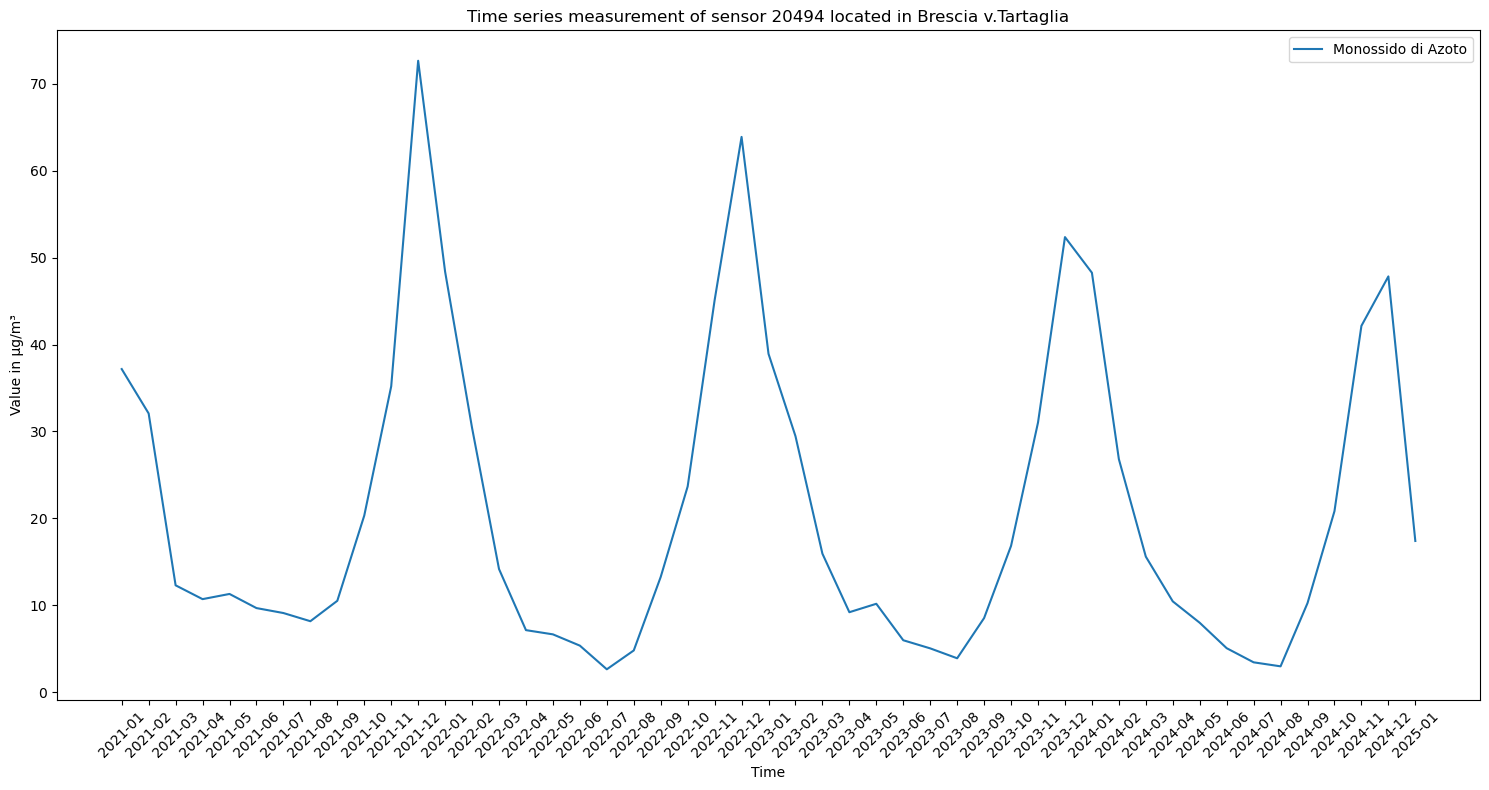

In [40]:
plt.figure(figsize=(15, 8))
df["month"] = pd.to_datetime(df["month"]).dt.strftime("%Y-%m") #Convert the data to a datetime object and format it to YYYY-MM
plt.plot(df["month"], df["monthly_avg"], label=Selected_pollutant.value)  #Plot the data, x axis is "data" and y axis is "valore"
plt.legend()  #Prints the legend on the graph
plt.title(f"Time series measurement of sensor {Selected_sensor.value["id_sensore"]} located in {Selected_sensor.value["nome_stazione"]}")  #Prints the title on top of graph
plt.xlabel("Time")  # Prints X axis label as "X-axis"
units=get_measurement_unit(Selected_pollutant.value) #Get the measurement unit of the pollutant
plt.ylabel(f"Value in {units}")  # Prints Y axis label as "Y-axis"
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DV_6

In [ ]:
# DV-6
#select the data we want as parameters, this will be done using a button
data = {"var_pollutant" :"Biossido di Azoto"} #Right now data is a dictionary

# send the request to the server, we use post because we are sending data to the server
t=requests.post(url="http://127.0.0.1:5000/api/DV_6", json=data) #json= data will convert the dictionary to a json object and send it to the server

data = read_response(t)

The query returned 167 rows
<class 'list'>


<Axes: >

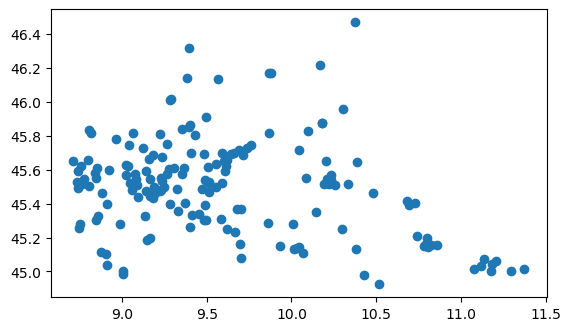

In [18]:
gdf = gpd.GeoDataFrame(data)
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
gdf.set_geometry('geometry', inplace=True)
gdf.plot()